In [1]:
import pandas as pd

df = pd.read_csv("./data/healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [2]:
print(f'\033[94mNumber of rows and columns: {df.shape[0], df. shape[1]}' )
print(f'\033[94mNumber of duplicate data: {df.duplicated().sum()}')
print(f'\033[94mNumber missing data: {sum(df.isna().sum())}')

Number of rows and columns: (55500, 15)
Number of duplicate data: 534
Number missing data: 0


In [3]:
df.drop_duplicates(keep='first',inplace=True)
missing_val = df.isnull().sum()[df.isnull().sum()> 0]
print(missing_val)

Series([], dtype: int64)


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,54966.0,51.535185,19.605661,13.00000,35.000000,52.000000,68.000000,89.000000
Billing Amount,54966.0,25544.306284,14208.409711,-2008.49214,13243.718641,25542.749145,37819.858159,52764.276736
Room Number,54966.0,301.124404,115.223143,101.00000,202.000000,302.000000,401.000000,500.000000


In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

def feature_importance(df, target_column):
    # Lấy các thuộc tính số
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    X = numeric_df.drop(columns=[target_column])
    y = numeric_df[target_column]
    
    # Áp dụng Random Forest để đánh giá
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)
    
    # Lấy độ quan trọng
    importance = model.feature_importances_
    return pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

# Example usage
df = pd.read_csv("./data/healthcare_dataset.csv")
feature_importances = feature_importance(df, target_column='Billing Amount')
print(feature_importances)


       Feature  Importance
1  Room Number    0.563425
0          Age    0.436575


In [6]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def preprocess_data(df):
    # Loại bỏ các cột không cần thiết
    columns_to_drop = ['Name', 'Room Number', 'Discharge Date', 'Doctor', 'Gender', 'Date of Admission', 'Test Results']
    df = df.drop(columns=columns_to_drop, axis=1)

    # Loại bỏ các giá trị thiếu (NaN) trong toàn bộ dữ liệu
    df = df.dropna()

    # Tiền xử lý các cột phân loại
    categorical_cols = ['Blood Type', 'Medical Condition', 
                        'Hospital', 'Insurance Provider', 'Admission Type', 'Medication']
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    # Loại bỏ hoặc thay thế giá trị NaN trong cột mục tiêu (nếu có)
    if df['Billing Amount'].isnull().any():
        print("Warning: Billing Amount contains NaN values. Filling with mean.")
        df['Billing Amount'] = df['Billing Amount'].fillna(df['Billing Amount'].mean())

    return df

def calculate_feature_importance(df, target_column):
    # Tiền xử lý dữ liệu
    df = preprocess_data(df)
    
    # Tách dữ liệu thành đầu vào (X) và đầu ra (y)
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Mã hóa các cột phân loại (categorical columns) thành các cột nhị phân (dummy columns)
    X_encoded = pd.get_dummies(X, drop_first=True)

    # Chia dữ liệu thành tập huấn luyện và kiểm tra (training and test sets)
    X_train, X_test, y_train, y_test = train_test_split(
        X_encoded, y, test_size=0.2, random_state=42
    )

    # Huấn luyện mô hình Random Forest
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    # Lấy độ quan trọng của các thuộc tính
    feature_importances = pd.DataFrame({
        'Feature': X_encoded.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    return feature_importances

# Sử dụng ví dụ: Đọc dữ liệu và tính toán độ quan trọng của các thuộc tính
df = pd.read_csv("./data/healthcare_dataset.csv")
target_column = "Billing Amount"
feature_importances = calculate_feature_importance(df, target_column)

# Hiển thị kết quả
print("Feature Importances:")
print(feature_importances)


Feature Importances:
                                  Feature  Importance
0                                     Age    0.089761
4857                Admission Type_Urgent    0.009591
4856             Admission Type_Emergency    0.009005
4852        Insurance Provider_Blue Cross    0.008786
4853             Insurance Provider_Cigna    0.008736
...                                   ...         ...
662                  Hospital_Cordova LLC    0.000000
1475           Hospital_Hernandez-Morales    0.000000
1476            Hospital_Hernandez-Patton    0.000000
3333            Hospital_Robinson-Mcgrath    0.000000
2439  Hospital_Martinez Garrison and Kim,    0.000000

[4862 rows x 2 columns]


In [7]:
import pandas as pd

# Đọc dữ liệu
file_path = './data/healthcare_dataset.csv'  # Đảm bảo file CSV của bạn có đường dẫn chính xác
df = pd.read_csv(file_path)

# Xem thông tin cơ bản về dữ liệu
print(df.info())

# Xem trước dữ liệu
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11315 entries, 0 to 11314
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                5133 non-null   object 
 1   Age                 5133 non-null   float64
 2   Gender              5133 non-null   object 
 3   Blood Type          5133 non-null   object 
 4   Medical Condition   5133 non-null   object 
 5   Date of Admission   5133 non-null   object 
 6   Doctor              5133 non-null   object 
 7   Hospital            5133 non-null   object 
 8   Insurance Provider  5133 non-null   object 
 9   Billing Amount      5133 non-null   float64
 10  Room Number         5133 non-null   float64
 11  Admission Type      5133 non-null   object 
 12  Discharge Date      5133 non-null   object 
 13  Medication          5133 non-null   object 
 14  Test Results        5133 non-null   object 
dtypes: float64(3), object(12)
memory usage: 1.3+ MB
None


In [8]:
# Chọn các cột quan trọng
selected_columns = ['Age', 'Medical Condition', 'Admission Type', 'Insurance Provider', 'Billing Amount']
df_filtered = df[selected_columns]

# Xem dữ liệu đã lọc
print(df_filtered.head())


    Age Medical Condition Admission Type Insurance Provider  Billing Amount
0  30.0            Cancer         Urgent         Blue Cross     18856.28131
1  62.0           Obesity      Emergency           Medicare     33643.32729
2  76.0           Obesity      Emergency              Aetna     27955.09608
3  28.0          Diabetes       Elective           Medicare     37909.78241
4  43.0            Cancer         Urgent              Aetna     14238.31781


In [9]:
# Xử lý giá trị thiếu
df_filtered = df_filtered.dropna()

# Mã hóa cột phân loại
categorical_cols = ['Medical Condition', 'Admission Type', 'Insurance Provider']
df_encoded = pd.get_dummies(df_filtered, columns=categorical_cols, drop_first=True)

# Tách dữ liệu thành đầu vào (X) và đầu ra (y)
X = df_encoded.drop(columns=['Billing Amount'])
y = df_encoded['Billing Amount']

print("Dữ liệu đầu vào (X):", X.head(), sep="\n")
print("Dữ liệu đầu ra (y):", y.head(), sep="\n")


Dữ liệu đầu vào (X):
    Age  Medical Condition_Asthma  Medical Condition_Cancer  \
0  30.0                     False                      True   
1  62.0                     False                     False   
2  76.0                     False                     False   
3  28.0                     False                     False   
4  43.0                     False                      True   

   Medical Condition_Diabetes  Medical Condition_Hypertension  \
0                       False                           False   
1                       False                           False   
2                       False                           False   
3                        True                           False   
4                       False                           False   

   Medical Condition_Obesity  Admission Type_Emergency  Admission Type_Urgent  \
0                      False                     False                   True   
1                       True                   

In [10]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Số lượng mẫu trong tập huấn luyện: {len(X_train)}")
print(f"Số lượng mẫu trong tập kiểm tra: {len(X_test)}")


Số lượng mẫu trong tập huấn luyện: 4106
Số lượng mẫu trong tập kiểm tra: 1027


In [11]:
from sklearn.ensemble import RandomForestRegressor

# Huấn luyện mô hình
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

print("Mô hình đã được huấn luyện xong!")


Mô hình đã được huấn luyện xong!


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Tính các chỉ số
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 252451281.2554732
Mean Absolute Error (MAE): 13204.371417995655
R-squared (R2): -0.2413581364715609


In [15]:
import joblib

# Triển khai mô hình
def predict_billing(input_data):
    model = joblib.load('billing_prediction_model.pkl')
    return model.predict(input_data)

# Ví dụ: Dự đoán chi phí viện phí cho một bệnh nhân
sample_input = X_test.iloc[0].values.reshape(1, -1)
predicted_cost = predict_billing(sample_input)
print(f"Dự đoán chi phí viện phí: {predicted_cost[0]:.2f}")

Dự đoán chi phí viện phí: 25478.01


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


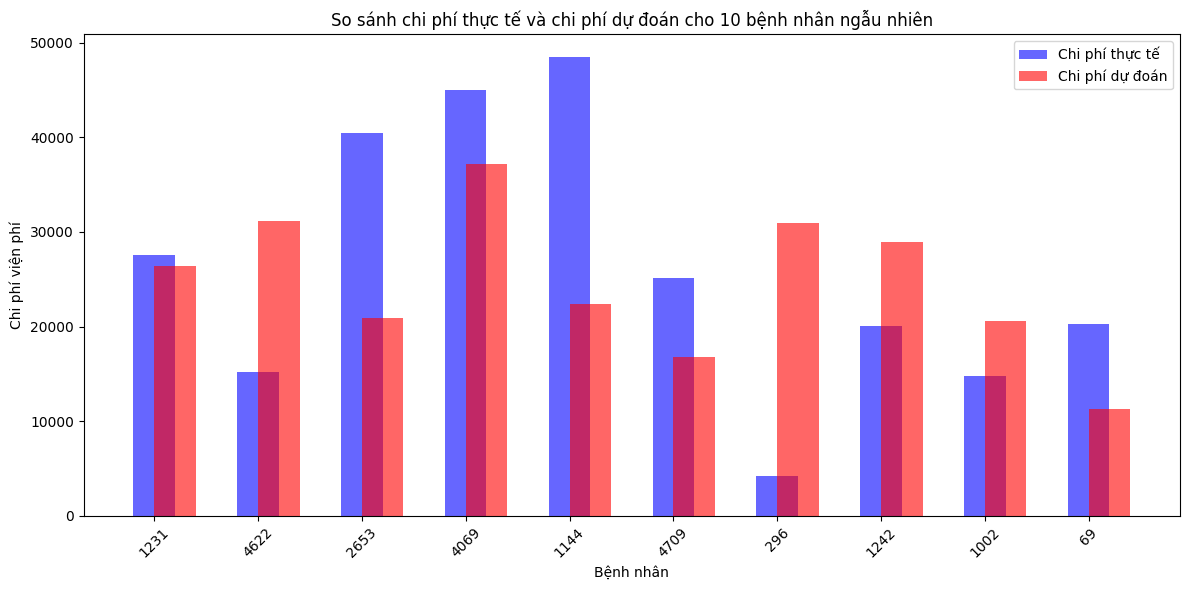

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

def predict_billing(input_data):
    model = joblib.load('billing_prediction_model.pkl')  
    return model.predict(input_data)

random_samples = X_test.sample(n=10, random_state=42)

predicted_costs = predict_billing(random_samples)

actual_costs = y_test.loc[random_samples.index]

plt.figure(figsize=(12, 6))

plt.bar(range(10), actual_costs, alpha=0.6, label='Chi phí thực tế', color='b', width=0.4, align='center')
plt.bar(range(10), predicted_costs, alpha=0.6, label='Chi phí dự đoán', color='r', width=0.4, align='edge')

plt.xlabel('Bệnh nhân')
plt.ylabel('Chi phí viện phí')
plt.title('So sánh chi phí thực tế và chi phí dự đoán cho 10 bệnh nhân ngẫu nhiên')
plt.xticks(range(10), random_samples.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


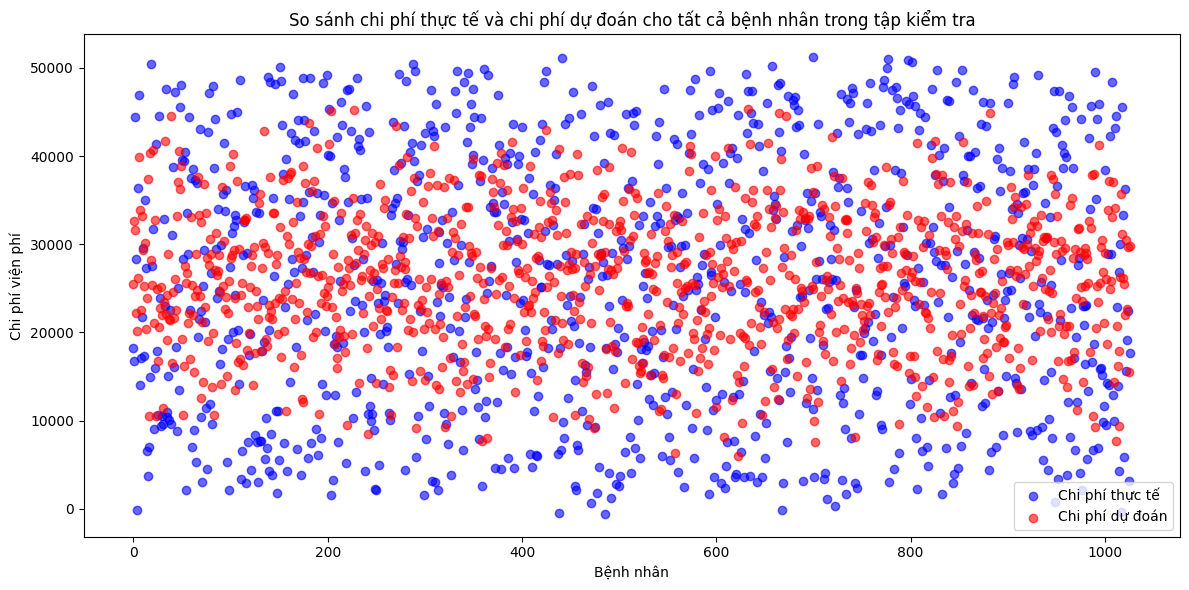

In [18]:
# Dự đoán viện phí cho tất cả bệnh nhân trong tập kiểm tra
predicted_costs = predict_billing(X_test)

# So sánh chi phí thực tế và chi phí dự đoán
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='b', label='Chi phí thực tế', alpha=0.6)
plt.scatter(range(len(predicted_costs)), predicted_costs, color='r', label='Chi phí dự đoán', alpha=0.6)
plt.xlabel('Bệnh nhân')
plt.ylabel('Chi phí viện phí')
plt.title('So sánh chi phí thực tế và chi phí dự đoán cho tất cả bệnh nhân trong tập kiểm tra')
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
from sklearn.cluster import KMeans
import pandas as pd

kmeans = KMeans(n_clusters=5, random_state=42) 
X['Cluster'] = kmeans.fit_predict(X)

print(X[['Cluster']].head())

   Cluster
0        1
1        0
2        2
3        3
4        4


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

models = {}

for cluster in X['Cluster'].unique():
    print(f"Huấn luyện mô hình cho cụm {cluster}...")
    
    cluster_data = X[X['Cluster'] == cluster]
    y_cluster = y[X['Cluster'] == cluster] 
    
    X_train, X_test, y_train, y_test = train_test_split(cluster_data.drop(columns=['Cluster']), y_cluster, test_size=0.2, random_state=42)
    
    model.fit(X_train, y_train)
    
    models[cluster] = model
    joblib.dump(model, f'billing_prediction_model_cluster_{cluster}.pkl')

print("Huấn luyện và lưu mô hình cho tất cả các cụm đã hoàn tất.")

Huấn luyện mô hình cho cụm 1...
Huấn luyện mô hình cho cụm 0...
Huấn luyện mô hình cho cụm 2...
Huấn luyện mô hình cho cụm 3...
Huấn luyện mô hình cho cụm 4...
Huấn luyện và lưu mô hình cho tất cả các cụm đã hoàn tất.


In [21]:
patient_input = X_test.iloc[0].values.reshape(1, -1)

cluster = kmeans.predict(patient_input)[0]

model = joblib.load(f'billing_prediction_model_cluster_{cluster}.pkl')

predicted_cost = model.predict(patient_input)

print(f"Dự đoán chi phí viện phí cho bệnh nhân thuộc cụm {cluster}: {predicted_cost[0]:.2f}")

Dự đoán chi phí viện phí cho bệnh nhân thuộc cụm 4: 15630.54


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [22]:
# Giả sử bạn đã huấn luyện mô hình Random Forest (như ở các bước trước)
model = RandomForestRegressor(n_estimators=100, random_state=42)
X = df_filtered.drop(columns=['Billing Amount', 'Cluster'])
y = df_filtered['Billing Amount']
model.fit(X, y)

# Dự đoán viện phí
df_filtered['Predicted Billing'] = model.predict(X)

# Hiển thị một số dự đoán
print(df_filtered[['Age', 'Medical Condition', 'Admission Type', 'Insurance Provider', 'Predicted Billing']].head())


KeyError: "['Cluster'] not found in axis"